# PDI

- Executado com 25 imagens para cada uma das 15 classes

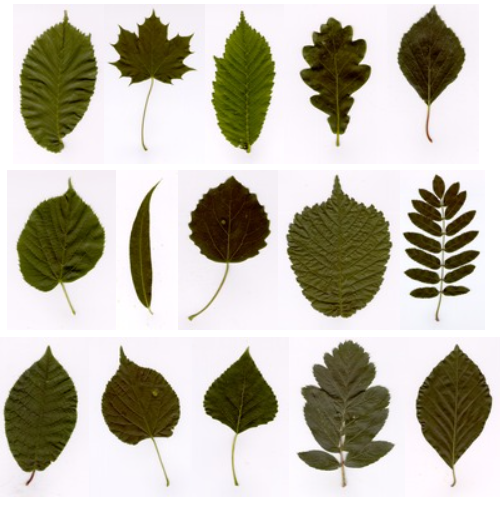

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from os import listdir


In [2]:
#Definindo o filtro de gabor (trocar para log-gabor quando nescessario)
def gabor(lamda, theta, psi, sigma, gamma, M, N):

  (x,y) = np.meshgrid(np.arange(0,N), np.arange(0,M))

  # Rotation 
  xl =  (x-N/2) * np.cos(theta) + (y-M/2) * np.sin(theta)
  yl = -(x-N/2) * np.sin(theta) + (y-M/2) * np.cos(theta)

  gab_filter = np.cos((2*np.pi/lamda)*xl + psi)  
  gab_filter = gab_filter * np.exp((-1/(2*sigma**2))*(xl**2 + gamma**2 * yl**2))

  return gab_filter 

In [3]:
def filter(imgFreq, gb, P, Q, M, N):
    #G = H*F
    Fimg_filtered = gb*imgFreq

    #fft inversa
    img_back = np.fft.ifft2(Fimg_filtered)

    # Multiplicao por (-1)^(x+y)
    mult_img_back = np.zeros([P, Q])
    for x in range(P):
        for y in range(Q):
            mult_factor = (-1)**(x+y)
            mult_img_back[x, y] = img_back[x, y].real * mult_factor

    final_img = mult_img_back[0:M, 0:N]

    return final_img

In [4]:
#img_path = 'C:/Users/mathe/OneDrive/Área de Trabalho/Stuff/UFSCAR/PDI/Trabalho/Dataset/Images'
img_path = './Dataset/Images'

df = pd.DataFrame()

#for img_filename in listdir(img_path):
#    print(f'{img_path}/{img_filename}')

In [5]:
i = 1
classes = []

#para cada imagem:
for img_filename in listdir(img_path):
    print(f'{i}: Processing imag: {img_path}/{img_filename}')
    # Lê imagem e automaticamente converte para 1 canal de cinza
    img = cv2.imread(img_path + '/' + img_filename, cv2.IMREAD_GRAYSCALE)

    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)

    img2 = img.reshape(-1)
    df_image = pd.DataFrame()
    df_image['Original Image'] = img2

    #Padding 
    M, N = img.shape
    img_padded = np.pad(img, ((0, M), (0, N)), 
                        mode='constant', constant_values=0)
    P, Q = img_padded.shape


    # Multiplicao por (-1)^(x+y)
    mult_img = np.zeros([P, Q])

    for x in range(P):
        for y in range(Q):
            mult_factor = (-1)**(x+y)
            mult_img[x, y] = img_padded[x, y] * mult_factor
    #mult_img = img_padded * np.fromfunction(lambda x, y: (-1)**(x+y), img_padded.shape)

    # Converter imagem do domínio do espaço para o domínio da frequência
    f = np.fft.fft2(mult_img)

    # =====================================
    count = 1
    #Cria filtros de gabor
    classes.append(img_filename.split('nr')[0])
    for theta in range(3):
        theta = theta * 60 * (np.pi/180)
        for sigma in (30, 50):
            for lamba  in (25, 50):
                for gamma in (0.5, 1):
                    label = 'Gabor-' + str(count)

                    psi = 0
                    gb = gabor(lamba, theta, psi, sigma, gamma, P, Q)

                    fimg = filter(f, gb, P, Q, M, N)
                    filtered_img = fimg.reshape(-1)
                    df_image[label] = filtered_img
                    count += 1

    count = 0
    flattened = df_image.values.reshape(1, -1)
    df = pd.concat([df, pd.DataFrame(flattened)], ignore_index=True)
    i += 1
df.insert(0, 'classe', classes)
df

1: Processing imag: ./Dataset/Images/l10nr001.tif
2: Processing imag: ./Dataset/Images/l10nr002.tif
3: Processing imag: ./Dataset/Images/l10nr003.tif
4: Processing imag: ./Dataset/Images/l10nr004.tif
5: Processing imag: ./Dataset/Images/l10nr005.tif
6: Processing imag: ./Dataset/Images/l10nr006.tif
7: Processing imag: ./Dataset/Images/l10nr007.tif
8: Processing imag: ./Dataset/Images/l10nr008.tif
9: Processing imag: ./Dataset/Images/l10nr009.tif
10: Processing imag: ./Dataset/Images/l10nr010.tif
11: Processing imag: ./Dataset/Images/l10nr011.tif
12: Processing imag: ./Dataset/Images/l10nr012.tif
13: Processing imag: ./Dataset/Images/l10nr013.tif
14: Processing imag: ./Dataset/Images/l10nr014.tif
15: Processing imag: ./Dataset/Images/l10nr015.tif
16: Processing imag: ./Dataset/Images/l10nr016.tif
17: Processing imag: ./Dataset/Images/l10nr017.tif
18: Processing imag: ./Dataset/Images/l10nr018.tif
19: Processing imag: ./Dataset/Images/l10nr019.tif
20: Processing imag: ./Dataset/Images/l1

,classe,0,1,2,3,4,5,6,7,8,...,1638390,1638391,1638392,1638393,1638394,1638395,1638396,1638397,1638398,1638399
0,l10,250.0,80.850863,71.679898,80.756243,71.618853,92.761305,77.791329,92.607300,77.695444,...,122.381876,122.360781,0.000002,0.019084,0.590199,5.447143,0.002330,-0.000002,0.003705,0.243583
1,l10,252.0,81.167313,71.979321,81.248403,72.063543,93.111277,78.099775,93.192457,78.179388,...,123.245574,123.292371,0.000002,0.019213,0.594925,5.486677,0.002197,-0.000002,0.003974,0.245274
2,l10,251.0,81.050049,71.829605,81.089298,71.880249,92.964513,77.956813,93.065425,78.039955,...,123.047086,123.018562,0.000002,0.019191,0.594133,5.476286,0.002261,-0.000002,0.003956,0.244939
3,l10,251.0,81.080662,71.870837,81.190406,71.976264,93.012817,77.973121,93.149325,78.110897,...,122.499687,122.461445,0.000003,0.019110,0.592092,5.456558,0.002316,-0.000002,0.003957,0.244223
4,l10,255.0,82.443778,73.091851,82.485688,73.118964,94.623062,79.348526,94.633838,79.354983,...,123.503509,123.490637,0.000003,0.019276,0.597203,5.503205,0.002492,-0.000002,0.003860,0.246079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,l9,251.0,81.216014,71.990712,81.223987,72.005280,93.205858,78.143898,93.183077,78.140342,...,127.050999,127.041947,0.000003,0.019743,0.614209,5.654902,0.002392,-0.000002,0.003994,0.252907
371,l9,251.0,81.135037,71.939056,81.034723,71.880354,93.050806,78.048580,92.899198,77.959435,...,124.747948,124.733223,0.000003,0.019415,0.603626,5.556264,0.002638,-0.000002,0.003731,0.248706
372,l9,249.0,80.595575,71.486861,80.551977,71.423511,92.450316,77.556798,92.407745,77.491167,...,127.392594,127.331302,0.000003,0.019814,0.616606,5.675791,0.002312,-0.000002,0.004210,0.253902
373,l9,249.0,80.702641,71.561504,80.710709,71.569248,92.590939,77.657578,92.581461,77.651732,...,125.114372,125.076511,0.000003,0.019446,0.606798,5.580111,0.002503,-0.000002,0.004020,0.249789


# AM

- Note que agora o vetor $df$ armazena as caracteristicas obtidas pelo banco de filtros em cima da imagem

In [8]:
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [9]:
random_seed = 42
df = df.sample(frac=1, random_state=random_seed).reset_index(drop=True)
df



,classe,0,1,2,3,4,5,6,7,8,...,1638390,1638391,1638392,1638393,1638394,1638395,1638396,1638397,1638398,1638399
0,l1,248.0,80.339518,71.245641,80.288061,71.200427,92.201207,77.351865,92.135359,77.282368,...,126.917879,126.918747,0.000003,0.019743,0.614195,5.654324,0.002385,-0.000002,0.004164,0.252906
1,l11,248.0,80.205836,71.095930,80.167130,71.071292,92.035283,77.171905,91.995545,77.143459,...,126.499266,126.458551,0.000002,0.019666,0.611775,5.632136,0.002235,-0.000002,0.003994,0.251911
2,l10,251.0,81.151960,71.958572,81.194452,72.009407,93.091691,78.083052,93.148306,78.121578,...,121.366578,121.324718,0.000002,0.018943,0.586793,5.407600,0.002022,-0.000002,0.003992,0.241948
3,l7,253.0,81.528240,72.262894,81.556175,72.297178,93.544252,78.444789,93.549178,78.448094,...,125.189729,125.393012,0.000003,0.019665,0.610483,5.617665,0.002367,-0.000002,0.004284,0.251369
4,l12,252.0,81.494863,72.247276,81.553191,72.298928,93.518393,78.421009,93.544714,78.454263,...,122.779620,122.803162,0.000002,0.019122,0.594028,5.472117,0.002040,-0.000002,0.003921,0.244712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,l12,247.0,80.178261,71.084120,80.112793,71.031987,92.010794,77.162115,91.918589,77.084327,...,125.847052,125.850807,0.000003,0.019571,0.608893,5.604376,0.002365,-0.000002,0.004083,0.250447
371,l14,247.0,79.906513,70.861239,79.946259,70.878250,91.674713,76.881046,91.755149,76.943109,...,125.308603,125.270791,0.000002,0.019434,0.604639,5.569308,0.002309,-0.000002,0.004140,0.248934
372,l5,250.0,80.821672,71.637330,80.776951,71.614141,92.741810,77.761246,92.665516,77.710270,...,125.760254,125.735245,0.000003,0.019521,0.607634,5.594830,0.002625,-0.000002,0.003936,0.249909
373,l8,248.0,80.171612,71.019700,80.240423,71.119493,92.026070,77.091608,92.037660,77.177342,...,125.396335,125.437065,0.000003,0.019503,0.606962,5.586869,0.002450,-0.000002,0.004126,0.249828


## Decision Tree

In [10]:
Atributos = df.drop(columns=['classe'])  # Atributos
y = df['classe']  # Variavel objetivo

#Separa testes de treino
X_train, X_test, y_train, y_test = train_test_split(Atributos, y, test_size=0.3, random_state=42)

#Treina modelo
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

#Usa modelo nos dados de teste
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.28
              precision    recall  f1-score   support

          l1       0.00      0.00      0.00         6
         l10       0.86      0.86      0.86         7
         l11       0.00      0.00      0.00         8
         l12       0.11      1.00      0.19         7
         l13       0.00      0.00      0.00        11
         l14       0.00      0.00      0.00         9
         l15       0.00      0.00      0.00         8
          l2       0.25      0.33      0.29         3
          l3       0.25      1.00      0.40         5
          l4       0.00      0.00      0.00         7
          l5       0.00      0.00      0.00        10
          l6       0.00      0.00      0.00        10
          l7       0.67      0.86      0.75         7
          l8       0.88      1.00      0.93         7
          l9       0.00      0.00      0.00         8

    accuracy                           0.28       113
   macro avg       0.20      0.34      0.23       113
weighted av

C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

## Random Forest

In [11]:
# Instanciar a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=32, random_state=42)

# Ajustar o modelo para os dados de treinamento
rf_classifier.fit(X_train, y_train)

# Fazer predições nos dados de teste
y_pred = rf_classifier.predict(X_test)

# Evaluate the model (you can use accuracy, precision, recall, etc.)
accuracy = rf_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.71
              precision    recall  f1-score   support

          l1       0.50      0.50      0.50         6
         l10       1.00      1.00      1.00         7
         l11       0.86      0.75      0.80         8
         l12       0.50      0.86      0.63         7
         l13       0.60      0.55      0.57        11
         l14       0.78      0.78      0.78         9
         l15       0.86      0.75      0.80         8
          l2       0.50      0.67      0.57         3
          l3       0.43      0.60      0.50         5
          l4       0.50      0.57      0.53         7
          l5       0.60      0.60      0.60        10
          l6       1.00      0.60      0.75        10
          l7       0.75      0.86      0.80         7
          l8       1.00      1.00      1.00         7
          l9       1.00      0.62      0.77         8

    accuracy                           0.71       113
   macro avg       0.72      0.71      0.71       113
weighted av

## Naive Bayes

In [12]:
#Aqui precisa normalizar
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.22
              precision    recall  f1-score   support

          l1       1.00      0.17      0.29         6
         l10       0.13      1.00      0.23         7
         l11       0.00      0.00      0.00         8
         l12       0.00      0.00      0.00         7
         l13       1.00      0.09      0.17        11
         l14       1.00      0.11      0.20         9
         l15       0.00      0.00      0.00         8
          l2       0.11      1.00      0.20         3
          l3       0.00      0.00      0.00         5
          l4       0.00      0.00      0.00         7
          l5       0.00      0.00      0.00        10
          l6       0.29      0.70      0.41        10
          l7       1.00      0.43      0.60         7
          l8       0.00      0.00      0.00         7
          l9       1.00      0.25      0.40         8

    accuracy                           0.22       113
   macro avg       0.37      0.25      0.17       113
weighted av

C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

## SVM

TODO